## 第二章 随机变量有其分布练习

In [1]:
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all' #默认为'last'

import numpy as np
import pandas as pd
import os
import sympy 
from sympy import *
# from sympy.abc import *
# from sympy import gamma
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei'] #指定默认字体 SimHei为黑体
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
sympy.init_printing(use_latex=True)
x, y, z = symbols('x y z',real=True)

## 正态分布代码  
```
mu,sigma = symbols('mu sigma')
fx = (1/(sigma*sqrt(2*pi)))*exp(-(x-mu)**2/(2*sigma**2))
```

随机变量及其分布

# 随机变量

# 离散型随机变量及其分布律

## 0-1分布  
$\begin{array}{c|cc} 
X & 0 & 1 \\
\hline
p_k & 1-p & p \\
\end{array}$

## 二项分布 (伯努利分布)  
$X\sim b(n,p) \\ 
P\{X=k\}=C_n^kp^k(1-p)^{n-k} \ (k=0,1,...,n)$

## 泊松分布  
$X\sim \pi(\lambda) \\ 
P(x=k)=\frac{\lambda^k}{k!}e^{-\lambda} \ (k=0,1,2,...)$  
```
lamda = symbols('lamda')
px = exp(-lamda)*lamda**k/factorial(k)
```

## 几何分布
$X\sim G(p) \\
P(x=k)=p(1-p)^{k-1} \ (k=1,2,...)$  
$

## 超几何分布  
$X\sim H(N,M,n)$  
$p\{x=k\}=\frac{C_M^k C_{N-M}^{n-k}}{C_N^n}$

# 随机变量的分布函数

# 连续型随机变量及其概率密度

## 均匀分布  
$X\sim U(a,b)$  

## 指数分布  
$X\sim E(\lambda)$  
$f(x)=\begin{cases} \lambda e^{- \lambda x} & x > 0 \\0 & x\le 0 \end{cases}$  
`$f(x)=\begin{cases} \lambda e^{- \lambda x} & x > 0 \\0 & x\le 0 \end{cases}$`

In [2]:
t1 = symbols('t')
t = symbols('t', positive=True)
lamda = symbols('lamda', real=True)
ft = lamda * exp(-lamda * t)
ft_ = Piecewise((lamda * exp(-lamda * t1),t1>0),(0, True))
ft_
print_latex(ft_)

⎧   -λ⋅t           
⎪λ⋅ℯ      for t > 0
⎨                  
⎪   0     otherwise
⎩                  

\begin{cases} \lambda e^{- \lambda t} & \text{for}\: t > 0 \\0 & \text{otherwise} \end{cases}


## 正态分布  
$X\sim N(\mu, \sigma^2) \\ 
f(x)=\frac{1}{\sqrt{2\pi}\sigma}e^{- \frac{\left(x - \mu \right)^{2}}{2 \sigma^{2}}}$  
```
mu,sigma = symbols('mu sigma')
fx = (1/(sigma*sqrt(2*pi)))*exp(-(x-mu)**2/(2*sigma**2))
```

In [3]:
mu,sigma = symbols('mu sigma')
fx = (1/(sigma*sqrt(2*pi)))*exp(-(x-mu)**2/(2*sigma**2))
print_latex(fx)

\frac{\sqrt{2} e^{- \frac{\left(- \mu + x\right)^{2}}{2 \sigma^{2}}}}{2 \sqrt{\pi} \sigma}


# 随机变量的函数的分布  
$$f_Y(y)=f_X(g^{-1}(y))|(g^{-1})\prime(y))|$$

### 例1  
$离散型随机变量X具有以下分布律 \\
$\begin{array}{c|cccc} 
X & -1 & 0 & 1 & 2\\
\hline
p & 0.2 & 0.3 & 0.1 & 0.4 \\
\end{array}$
试求Y=3X+2和Z=(X-1)^2的分布律
$

In [4]:
X=np.array([-1,0,1,2])
p=np.array([0.2,0.3,0.1,0.4])
Y=3*X+2
Z=(X-1)**2
Y
Z

array([-1,  2,  5,  8])

array([4, 1, 0, 1], dtype=int32)

In [5]:
df1 = pd.DataFrame(data=np.stack((Z,p),axis=1),columns=['Z','p'])
df1
dfg1 = df1.groupby("Z")
dfg1.sum()


,Z,p
0,4.0,0.2
1,1.0,0.3
2,0.0,0.1
3,1.0,0.4


,p
Z,
0.0,0.1
1.0,0.7
4.0,0.2


In [6]:
# Discrete probability distribution
# 离散型随机变量函数的分布
def DPD(X, p):
    '''
    离散型随机变量函数的分布
    :param X: 离散型随机变量的取值
    :param p: 离散型随机变量的概率
    :return: 离散型随机变量函数的分布
    '''
    return pd.DataFrame(data=np.stack((X, p), axis=1),
                        columns=['X', 'p']).groupby('X').sum()# 去重
DPD(X,p)
DPD(Y,p)
DPD(Z,p)

,p
X,
-1.0,0.2
0.0,0.3
1.0,0.1
2.0,0.4


,p
X,
-1.0,0.2
2.0,0.3
5.0,0.1
8.0,0.4


,p
X,
0.0,0.1
1.0,0.7
4.0,0.2


### 例3  
设随机变量X的概率密度函数为  
$f_X(x)=\frac{1}{\pi(1+x^2)}$  
求随机变量$Y=1-\sqrt[3]{X}$的概率密度

In [7]:
from sympy import symbols, integrate, pi, oo, diff, solve, Symbol, Abs

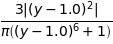

In [8]:
# 连续型随机变量函数的分布

x,y = symbols('x y')
f = 1- x**(1/3)-y
x1 = solve(f,x)[0] # solve得到列表, 值为f的反函数
fx=1/(pi*(1+x**2)) # X的概率密度函数
# fy = -fx.subs({x:x1})*diff(x1,y)
fy = fx.subs({x:x1})*Abs(diff(x1,y)) # 导数的绝对值
fy
integrate(fx, (x,-oo,oo))
integrate(fy, (y,-oo,oo))

### 例4 
设随机变量 $X\sim N(\mu, \sigma^2)$   
试证明随机变量$Y=aX+b$也服从正态分布  
$$X \sim \mathcal{N}(\mu, \sigma^2)$$  

In [9]:
from sympy import sqrt, exp, simplify

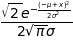

In [10]:
mu,sigma = symbols('mu sigma')
fx = (1/(sigma*sqrt(2*pi)))*exp(-(x-mu)**2/(2*sigma**2))
fx
mu,sigma = 3, 2
fx = (1/(sigma*sqrt(2*pi)))*exp(-(x-mu)**2/(2*sigma**2))
integrate(fx, (x, -oo, oo))
mu_ = integrate(x*fx, (x, -oo, oo)) # 期望
sigma_ = sqrt(integrate(x**2*fx, (x, -oo, oo)) - mu_**2) # 标准差
integrate((x-mu_)**2*fx, (x, -oo, oo)) # 方差
mu_,sigma_

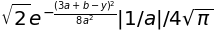

In [11]:
a, b, x, y = symbols('a b x y')
f = a*x+b-y
x1 = solve(f,x)[0]
x1
fy = fx.subs({x:x1})*Abs(diff(x1,y)) # 导数的绝对值
fy
# integrate(fx, (x,-oo,oo))
# integrate(fy, (y,-oo,oo))
simplify(fy)

In [12]:
# 反函数inverse function
x,y = symbols('x y')
f = 1- x**(1/3)-y
def inv_func(func,x):
    '''
    计算反函数
    :param func: 原函数 
    :param x: 自变量
    :return: 
    '''
    return solve(func,x)[0]
inv_func(f,x)
type(x)
type(f)
# 计算函数的分布
a, b, x, y = symbols('a b x y')
f = a*x+b-y
def func_density(fx, func, x, y):
    '''
    已知原分布概率密度求函数的概率密度
    :param fx: 自变量的分布
    :param func: 原函数
    :param x: 原分布的自变量
    :param y: 因变量，新分布的自变量
    :return: 
    '''
    x1 = solve(func,x)[0]
    fy = fx.subs({x:x1})*Abs(diff(x1,y)) # 导数的绝对值
    return fy

# def func_dist(Fx, Func, x, y):
#     '''
#     已知原分布分布函数求函数的分布函数
#     :param Fx: 自变量的分布
#     :param Func: 原函数
#     :param x: 原分布的自变量
#     :param y: 因变量，新分布的自变量
#     :return: 
#     '''
#     x1 = solve(Func,x)[0]
#     fy = Fx.subs({x:x1})*Abs(diff(x1,y)) # 导数的绝对值
#     return fy
# func_dist(fx,f,x,y)

sympy.core.symbol.Symbol

sympy.core.add.Add

### 例5
设随机变量X服从区间\[-1,9\]上的均匀分布求随机变量$Y=g(X)$的概率分布
$$g(x)=\begin{cases}-1 & x<1 \\ 1 & x=1 \\ 2 & 1<x\le 6 & \\ 3 & x>6\end{cases}$$

In [13]:
x,y = symbols('x y')
g = Piecewise((-1,x<1),(1,(x>=1)&(x<=1)),(2, (x>1) & (x<=6)),(3, x>6)) 
g
# plot(g)

⎧-1      for x < 1    
⎪                     
⎪1       for x = 1    
⎨                     
⎪2   for x ≤ 6 ∧ x > 1
⎪                     
⎩3       for x > 6    

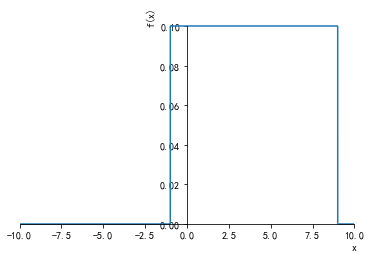

In [14]:
fx = Piecewise((0.1,(x>=-1) & (x<9)),(0, True))
plot(fx)
integrate(fx,(x,-oo,oo))


In [17]:
g
g.subs(x,1)
g.subs({x:1})
[g.subs(x,i) for i in [1,2,3,4]]
ranges = [-oo,1,6,+oo]
p_list = []
for i in range(len(ranges)-1):
    p_list.append(integrate(fx,(x, ranges[i], ranges[i+1])).evalf(2))
#     g.subs(x,integrate(fx,(x, ran[i], ran[i+1])))
p_list
pd.DataFrame(data=np.stack(([-1,2,3],p_list),axis=1),columns=['Y','p'])

⎧-1      for x < 1    
⎪                     
⎪1       for x = 1    
⎨                     
⎪2   for x ≤ 6 ∧ x > 1
⎪                     
⎩3       for x > 6    

,Y,p
0,-1,0.20
1,2,0.50
2,3,0.30


### 2003年数学三第11题  
设随机变量X的概率密度为$$f(x)=\begin{cases} \frac{1}{3\sqrt[3]{x^2}} & x \in [1,8]\\0 & other\end{cases}$$
F(X)是X的分布函数，求随机变量Y=F(X)的分布函数  


In [18]:
from fractions import Fraction

⎧  1                      
⎪──────  for x ≥ 1 ∧ x ≤ 8
⎪   2/3                   
⎨3⋅x                      
⎪                         
⎪  0         otherwise    
⎩                         

<string>:1: RuntimeWarning: invalid value encountered in double_scalars


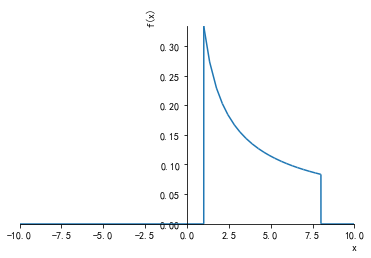

⎧⎧        0          for x < 1                   
⎪⎪                                               
⎪⎨3 ___________                 for x ≥ 1 ∧ x ≤ 8
⎪⎪╲╱ Min(8, x)  - 1  otherwise                   
⎨⎩                                               
⎪                                                
⎪              0                    for x < 1    
⎪                                                
⎩              1                    for x > 1    

<string>:1: RuntimeWarning: invalid value encountered in double_scalars


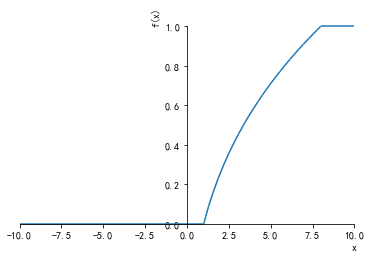

In [19]:
t = symbols('t')
fx = Piecewise((1/(3*x**(Fraction(2,3))),(x>=1)&(x<=8)),(0,True)) # 概率密度
fx
fx.subs(x,2)
integrate(fx,(x,-oo,oo))
# solve(fx,x)
plot(fx)

# 分布函数同时也是Y的方程
Fx = Piecewise((integrate(fx,(x,1,x)),(x>=1)&(x<=8)),(0,x<1),(1,x>1)) 
Fx
plot(Fx)
Fx.subs(x,3)

⎧⎧                                           3                         
⎪⎪             0                for (y + 1.0)  < 1                     
⎪⎨                                                  for y ≥ 0 ∧ y ≤ 1.0
⎪⎪3 ______________________                                             
⎪⎩╲╱ Min(8, (y + 1.0)**3)  - 1      otherwise                          
⎨                                                                      
⎪                                                                3     
⎪                        0                          for (y + 1.0)  < 1 
⎪                                                                      
⎪                                                                3     
⎩                        1                          for (y + 1.0)  > 1 

⎧0  for y < 0
⎪            
⎨y  for y ≤ 1
⎪            
⎩1  otherwise

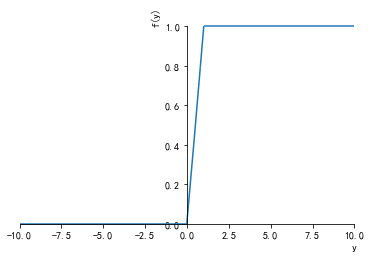

⎧0  for y < 0
⎪            
⎨1  for y ≤ 1
⎪            
⎩0  otherwise

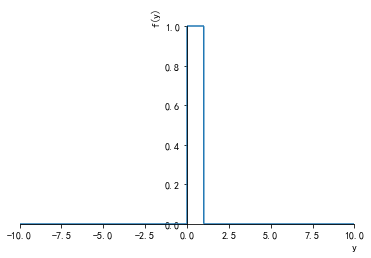

In [20]:
Fx_ = x**(1/3)-1-y
# fx_
# inv_func(f,x)
x1 = inv_func(Fx_,x)
Fx.subs(x,x1) #等待化简的结果

# Y的分布函数
Fy = Piecewise((0,y<0),(y,(y>=0) & (y<=1)),(1,y>1))
Fy
plot(Fy)
fy = diff(Fy,y)
fy
plot(fy)